In [1]:
import pandas as pd
import requests 
from bs4 import BeautifulSoup

In [3]:
search_query="airpods"

In [5]:
base_url="https://www.amazon.com/s?k="

In [7]:
url=base_url+search_query
url

'https://www.amazon.com/s?k=airpods'

In [9]:
header={'user-agent':
'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/130.0.0.0 Safari/537.36',
        'accept':'*/*','accept-encoding':'gzip, deflate, br, zstd',
        'accept-language': 'en-US,en;q=0.9',
        'connection':'keep-alive',
        'referer': 'https://www.amazon.com/'}

In [11]:
search_response=requests.get(url,headers=header)

In [13]:
search_response.status_code

200

In [15]:
search_response.text

'<!doctype html><html lang="en-us" class="a-no-js" data-19ax5a9jf="dingo"><!-- sp:feature:head-start -->\n<head><script>var aPageStart = (new Date()).getTime();</script><meta charset="utf-8"/>\n<!-- sp:end-feature:head-start -->\n<!-- sp:feature:csm:head-open-part1 -->\n\n<script type=\'text/javascript\'>var ue_t0=ue_t0||+new Date();</script>\n<!-- sp:end-feature:csm:head-open-part1 -->\n<!-- sp:feature:cs-optimization -->\n<meta http-equiv=\'x-dns-prefetch-control\' content=\'on\'>\n<link rel="dns-prefetch" href="https://images-na.ssl-images-amazon.com">\n<link rel="dns-prefetch" href="https://m.media-amazon.com">\n<link rel="dns-prefetch" href="https://completion.amazon.com">\n<!-- sp:end-feature:cs-optimization -->\n<!-- sp:feature:csm:head-open-part2 -->\n<script type=\'text/javascript\'>\nwindow.ue_ihb = (window.ue_ihb || window.ueinit || 0) + 1;\nif (window.ue_ihb === 1) {\n\nvar ue_csm = window,\n    ue_hob = +new Date();\n(function(d){var e=d.ue=d.ue||{},f=Date.now||function(){

In [17]:
search_response.cookies

<RequestsCookieJar[Cookie(version=0, name='session-id', value='133-5634107-7231927', port=None, port_specified=False, domain='.amazon.com', domain_specified=True, domain_initial_dot=True, path='/', path_specified=True, secure=True, expires=1763711049, discard=False, comment=None, comment_url=None, rest={}, rfc2109=False), Cookie(version=0, name='session-id-time', value='2082787201l', port=None, port_specified=False, domain='.amazon.com', domain_specified=True, domain_initial_dot=True, path='/', path_specified=True, secure=True, expires=1763711049, discard=False, comment=None, comment_url=None, rest={}, rfc2109=False), Cookie(version=0, name='i18n-prefs', value='USD', port=None, port_specified=False, domain='.amazon.com', domain_specified=True, domain_initial_dot=True, path='/', path_specified=True, secure=False, expires=1763711049, discard=False, comment=None, comment_url=None, rest={}, rfc2109=False), Cookie(version=0, name='sp-cdn', value='"L5Z9:PK"', port=None, port_specified=False,

In [19]:
cookie={}
def getAmazonSearch(search_query):
    url="https://www.amazon.com/s?k="+search_query
    print(url)
    page=requests.get(url,headers=header)
    if page.status_code==200:
        return page
    else:
        return "Error"

In [21]:
product_names = []
response = getAmazonSearch('airpods')
soup = BeautifulSoup(response.content)
for i in soup.findAll("span",{'class':'a-size-medium a-color-base a-text-normal'}):
    product_names.append(i.text)

https://www.amazon.com/s?k=airpods


In [23]:
product_names

['AirPods Pro 2 Wireless Earbuds, Bluetooth Headphones, Active Noise Cancellation, Hearing Aid Feature, Transparency, Personalized Spatial Audio, High-Fidelity Sound, H2 Chip, USB-C Charging',
 'AirPods 4 Wireless Earbuds, Bluetooth Headphones, with Active Noise Cancellation, Adaptive Audio, Transparency Mode, Personalized Spatial Audio, USB-C Charging Case, Wireless Charging, H2 Chip',
 'AirPods (3rd Generation) Wireless Ear Buds, Bluetooth Headphones, Personalized Spatial Audio, Sweat and Water Resistant, Lightning Charging Case Included, Up to 30 Hours of Battery Life',
 'AirPods Pro 2nd Generation with Wireless MagSafe Charging Case (USB-C) with Apple 1 Year Limited Warranty (Wireless Charger)',
 'Wireless Earbuds Bluetooth Ear Buds - 40H Playtime Stereo Bluetooth Headphones LED Display IPX7 Waterproof in-Ear Earphones with Mic Compatible with iPhone Android Phone, Black',
 'Vibe Beam - True Wireless JBL Deep Bass Sound Earbuds, Bluetooth 5.2, Water & Dust Resistant, Hands-free cal

In [25]:
len(product_names)

16

In [27]:
data_asin=[]
response=getAmazonSearch('airpods')
soup=BeautifulSoup(response.content,'html.parser')
for i in soup.findAll("div",{'class':"sg-col-20-of-24 s-result-item s-asin sg-col-0-of-12 sg-col-16-of-20 sg-col s-widget-spacing-small gsx-ies-anchor sg-col-12-of-16"}):
    data_asin.append(i['data-asin'])

https://www.amazon.com/s?k=airpods


In [29]:
data_asin

['B0D1XD1ZV3',
 'B0DGJ7HYG1',
 'B0D1WXVQTN',
 'B0DHWTDQD4',
 'B0DGPVMTW3',
 'B0BQPNMXQV',
 'B0CDRZ9X6B',
 'B0D3J85SX4',
 'B0CX1TJ228',
 'B0C1QDR7HP',
 'B0D5HG7TC3',
 'B0DC95VBG5',
 'B0DFK4T41L',
 'B0D57LDM6F',
 'B0C1QDNP2G',
 'B09V9P5Q6W']

In [57]:
def Searchasin(asin):
    url="https://www.amazon.com/Airpods/dp/"+asin
    print(url)
    page=requests.get(url,cookies=cookie,headers=header)
    if page.status_code==200:
        return page
    else:
        return "Error"

In [59]:
link=[]
for i in range(len(data_asin)):
    response=Searchasin(data_asin [i])
    soup = BeautifulSoup(response.content)
    for i in soup.findAll("a",{'data-hook':"see-all-reviews-link-foot"}):
        link.append(i['href'])

https://www.amazon.com/Airpods/dp/B0D1XD1ZV3
https://www.amazon.com/Airpods/dp/B0DGJ7HYG1
https://www.amazon.com/Airpods/dp/B0D1WXVQTN
https://www.amazon.com/Airpods/dp/B0DHWTDQD4
https://www.amazon.com/Airpods/dp/B0DGPVMTW3
https://www.amazon.com/Airpods/dp/B0BQPNMXQV
https://www.amazon.com/Airpods/dp/B0CDRZ9X6B
https://www.amazon.com/Airpods/dp/B0D3J85SX4
https://www.amazon.com/Airpods/dp/B0CX1TJ228
https://www.amazon.com/Airpods/dp/B0C1QDR7HP
https://www.amazon.com/Airpods/dp/B0D5HG7TC3
https://www.amazon.com/Airpods/dp/B0DC95VBG5
https://www.amazon.com/Airpods/dp/B0DFK4T41L
https://www.amazon.com/Airpods/dp/B0D57LDM6F
https://www.amazon.com/Airpods/dp/B0C1QDNP2G
https://www.amazon.com/Airpods/dp/B09V9P5Q6W


In [63]:
def fetch_reviews(review_url):
    page = requests.get(review_url, headers=header)
    if page.status_code != 200:
        return []
    soup = BeautifulSoup(page.content, 'html.parser')
    reviews = []
    for review in soup.find_all("span", {"data-hook": "review-body"}):
        reviews.append(review.text.strip())
    return reviews

In [65]:
review_links = []
response = getAmazonSearch("airpods")
if response != "Error":
    soup = BeautifulSoup(response.content, "html.parser")
    for link in soup.find_all("a", {"class": "a-link-normal"}, href=True):
        href = link["href"]
        if "customerReviews" in href:
            full_url = "https://www.amazon.com" + href
            review_links.append(full_url)

https://www.amazon.com/s?k=airpods


In [67]:
all_reviews = []
for link in review_links:
    reviews = fetch_reviews(link)
    all_reviews.extend(reviews)


In [69]:
review_data = pd.DataFrame({"Reviews": all_reviews})
pd.set_option('max_colwidth', 800)
review_data.head(5)

,Reviews
0,"I've owned multiple pairs of AirPods over the years—standard, Pro, and even the Max version. Up until now, my favorite had always been the first-generation AirPods Pro. But after debating whether or not to get the second-generation AirPods Pro, I finally took the plunge, and I’m glad I did. Here’s what I’ve noticed after using them.The biggest improvement I noticed right away was the noise cancellation. I spend a lot of time in loud environments, whether it's in a workshop or just crowded spaces, and the V2’s ANC works much better at filtering out background noise. There’s also this new feature where it seems to adjust based on voices around you, something that wasn’t in the first version. It’s made a noticeable difference when I need to focus or block out distractions.In terms of soun..."
1,"First, please comment if you have any questions and I would love to respond to help!I had the AirPods Pro Gen1 prior to these, but the new AirPods blew them out of the water. The added ear tips make customability even better especially for small ears like mine.The Active Noise Cancellation is clearly superior to the first generation and the addition of Adaptive audio is super cool and very useful.The battery is even better than I was expecting. The AirPods charge super fast in the case, and the case charging itself is also super fast. The USB-C cord is a very nice addition especially with the new, more common, USB-C charging block. The new Apple Braided USB-C cord is also a small but nice touch.I personally do not use the ring on the side, but I imagine many people may find it useful. ..."
2,"I never take the time to write reviews because why spend so much time on something that will ultimately have no effect on my life? Well in this case, these Airpods have met and exceeded every single one of my expectations and I figured that was worth writing about.Important disclaimers:- OF COURSE this is a subjective opinion, because that is all a review is. Take it with a grain of salt.- Different products work better or worse for different people, it's just that simple.- When talking about noise cancelling headphones, it's important to consider them for what they are, not what we think they SHOULD be.THE FIT:OKAY. I am someone who has very small ear cannals. I have spent years trying to find earbuds that fit my ears comfortably. Silicone in-ear tips have always been extremely uncomf..."
3,"After upgrading from the 2nd generation, I am quite happy with these Airpods 4. I was nervous about the fit since the 2nd generation is noticeably smaller than the 4s but the fit is perfectly fine. I do wear some third party ear hooks when I'm out and about in these as a precaution but they feel quite secure without them. I was scared they would feel heavy after I am used to both Airpods 2nd gen and wired small earpods but they're so light weight and incredibly comfortable. Even though I was content with the older Airpods sound quality these just sound so much more punchy and it's a great experience at a decent price. I was also impressed with the ANC. I like the ANC version because it allows me to charge my case with my watch charger if I don't have an available USB C cable, and the ..."
4,"These are the best AirPods. Don’t get me wrong, I have AirPods Pro 2 and they still sound a bit better and have better noise cancellation, but I now wear these a lot more time than my Pro 2. Reason is simple, these are more comfy, I don’t feel a thing wearing these. And they’re super secure on my ears. Of course it depends on your ear shape—but if these fit you well, they are amazing. Good enough noise cancellation, fantastic sound, literally equal-to-no-headphone level transparency mode.Simply put, I already have AirPods Pro 2 and AirPods Max (and I’m not giving those up), but I’m still keeping these, since they’re that good. They’re now an indispensable addition to my AirPods family. For anyone, they’ll become your fav pair of headphones in no time.\nRead more"

In [71]:
len(all_reviews)

131

In [73]:
review_data.shape

(131, 1)

In [75]:
review_data.to_csv('Scraping_reviews.csv')

In [77]:
review_data.to_excel('C:\\Users\\ihase\\Desktop\\amazon_reviews.xlsx', index=False)

In [87]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))
import nltk 
nltk.download('wordnet')
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.corpus import stopwords
import re
lemmatizer = WordNetLemmatizer()
stemmer=PorterStemmer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ihase\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ihase\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [89]:
import pandas as pd
import numpy as np 
from textblob import TextBlob
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from wordcloud import WordCloud

ModuleNotFoundError: No module named 'textblob'

In [95]:
pip install textblob

   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
    --------------------------------------- 10.2/626.3 kB ? eta -:--:--
    --------------------------------------- 10.2/626.3 kB ? eta -:--:--
   - ------------------------------------- 30.7/626.3 kB 187.9 kB/s eta 0:00:04
   - ------------------------------------- 30.7/626.3 kB 187.9 kB/s eta 0:00:04
   -- ------------------------------------ 41.0/626.3 kB 178.6 kB/s eta 0:00:04
   ---- ---------------------------------- 71.7/626.3 kB 262.6 kB/s eta 0:00:03
   ------ ------------------------------- 102.4/626.3 kB 328.0 kB/s eta 0:00:02
   ----------- -------------------------- 184.3/626.3 kB 507.5 kB/s eta 0:00:01
   ------------- ------------------------ 225.3/626.3 kB 599.0 kB/s eta 0:00:01
   ------------------ ------------------- 307.2/626.3 kB 703.7 kB/s eta 0:00:01
   ------------------------------ --------- 481.3/626.3 kB 1.0 MB/s eta 0:00:01
   ------------------------------ ------- 501.8/626.3 kB 954.4 kB

In [99]:
pip install wordcloud


   ---------------------------------------- 0.0/301.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/301.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/301.2 kB ? eta -:--:--
   --- ----------------------------------- 30.7/301.2 kB 259.2 kB/s eta 0:00:02
   ----- --------------------------------- 41.0/301.2 kB 245.8 kB/s eta 0:00:02
   ---------- ---------------------------- 81.9/301.2 kB 416.7 kB/s eta 0:00:01
   -------------- ----------------------- 112.6/301.2 kB 502.0 kB/s eta 0:00:01
   --------------------- ---------------- 174.1/301.2 kB 655.4 kB/s eta 0:00:01
   ---------------------------- --------- 225.3/301.2 kB 762.6 kB/s eta 0:00:01
   -------------------------------------- 301.2/301.2 kB 845.8 kB/s eta 0:00:00


In [101]:
import pandas as pd
import numpy as np 
from textblob import TextBlob
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from wordcloud import WordCloud

In [103]:
def preprocess(sentence):
    sentence = str(sentence)
    sentence = sentence.lower()
    sentence = sentence.replace('{html}', "")
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', sentence)
    rem_url = re.sub(r'http\S+', '', cleantext)
    rem_num = re.sub('[0-9]+', '', rem_url)
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(rem_num)
    filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english')]
    stem_words = [stemmer.stem(w) for w in filtered_words]
    lemma_words = [lemmatizer.lemmatize(w) for w in stem_words]
    return " ".join(filtered_words)

NameError: name 'df' is not defined

In [109]:
df=pd.read_csv('Scraping_reviews.csv')

In [111]:
df['cleanReviews']= df['Reviews'].map(lambda s:preprocess(s))

In [115]:
df.to_csv(r'cleaned-amazon.csv',index=False)

In [117]:
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

In [119]:
df['Subjectivity']= df['cleanReviews'].apply(getSubjectivity)

In [121]:
df['Polarity']= df['cleanReviews'].apply(getPolarity)

In [127]:
def GetAnalysis(score):
    if score<0:
        return 'Negative'
    elif score==0:
        return 'Neutral'
    else:
        return 'Positive'

In [135]:
df['Sen_tag']= df['Polarity'].apply(GetAnalysis)
df.head(2)

,Unnamed: 0,Reviews,cleanReviews,Subjectivity,Polarity,Sen_tag
0,0,"I've owned multiple pairs of AirPods over the years—standard, Pro, and even the Max version. Up until now, my favorite had always been the first-generation AirPods Pro. But after debating whether or not to get the second-generation AirPods Pro, I finally took the plunge, and I’m glad I did. Here’s what I’ve noticed after using them.The biggest improvement I noticed right away was the noise cancellation. I spend a lot of time in loud environments, whether it's in a workshop or just crowded spaces, and the V2’s ANC works much better at filtering out background noise. There’s also this new feature where it seems to adjust based on voices around you, something that wasn’t in the first version. It’s made a noticeable difference when I need to focus or block out distractions.In terms of soun...",owned multiple pairs airpods years standard pro even max version favorite always first generation airpods pro debating whether get second generation airpods pro finally took plunge glad noticed using biggest improvement noticed right away noise cancellation spend lot time loud environments whether workshop crowded spaces anc works much better filtering background noise also new feature seems adjust based voices around something first version made noticeable difference need focus block distractions terms sound say night day difference bass feels punchy new version sound crisper overall unless really paying attention upgrade might seem subtle one best things airpods pro improvement battery life getting almost double usage time compared first gen plus apple finally switched usb charging f...,0.438758,0.154688,Positive
1,1,"First, please comment if you have any questions and I would love to respond to help!I had the AirPods Pro Gen1 prior to these, but the new AirPods blew them out of the water. The added ear tips make customability even better especially for small ears like mine.The Active Noise Cancellation is clearly superior to the first generation and the addition of Adaptive audio is super cool and very useful.The battery is even better than I was expecting. The AirPods charge super fast in the case, and the case charging itself is also super fast. The USB-C cord is a very nice addition especially with the new, more common, USB-C charging block. The new Apple Braided USB-C cord is also a small but nice touch.I personally do not use the ring on the side, but I imagine many people may find it useful. ...",first please comment questions would love respond help airpods pro gen prior new airpods blew water added ear tips make customability even better especially small ears like mine active noise cancellation clearly superior first generation addition adaptive audio super cool useful battery even better expecting airpods charge super fast case case charging also super fast usb cord nice addition especially new common usb charging block new apple braided usb cord also small nice touch personally use ring side imagine many people may find useful addition find capabilities case airpods beyond helpful always seem misplace small bonus every time charge case airpods case sounds little chime let know charging battery low owner airpods max former owner airpods pro gen would recommend new generation...,0.523448,0.216591,Positive


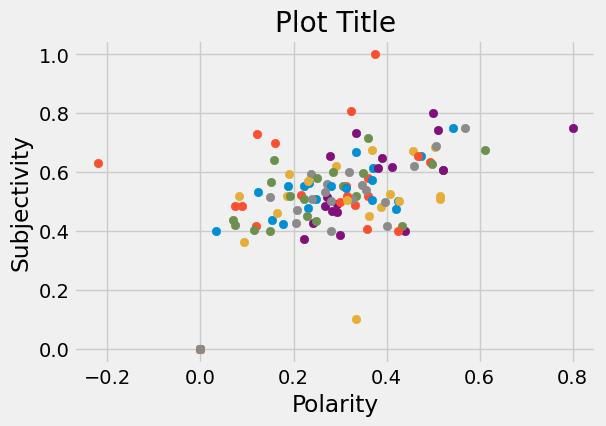

In [139]:
plt.figure(figsize=(6,4))
for i in range(0, df.shape[0]):
    plt.scatter(df['Polarity'][i], df['Subjectivity'][i])
plt.title('Plot Title')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

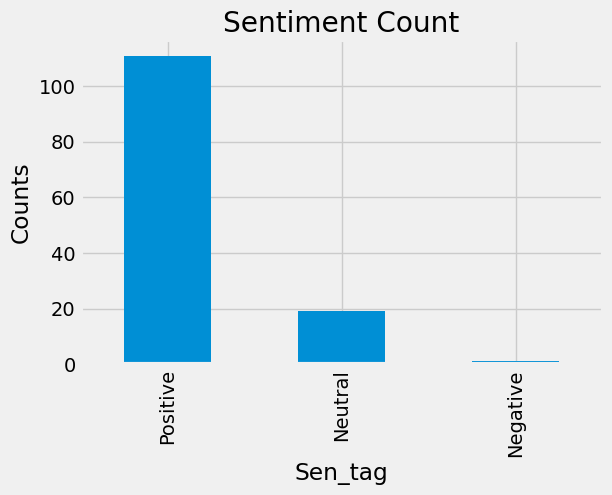

In [155]:
df['Sen_tag'].value_counts()
plt.figure(figsize=(6,4))
plt.title('Sentiment Count')
plt.xlabel('Sentiments')
plt.ylabel('Counts')
df['Sen_tag'].value_counts().plot(kind='bar')
plt.show()